# Анализ данных: финальный проект
## Прогнозирование временных рядов на карте
### II. Работа с геоданными
Задание:
1. Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.
2. Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.
3. Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.
4. Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.
5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.
6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.
7. Сохраните ноутбук в формате html, запакуйте ipynb и html в один архив и загрузите его в форму.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import os

%matplotlib inline

# Вспомогательные функции

# 1. Сохранение изображения, выведенного с помощью matpoltlib в файл
def save(name='', fmt='png'):
    pwd = os.getcwd()
    os.chdir('./pictures/%s' % fmt)
    plt.savefig('%s.%s' % (name, fmt), fmt='png')
    os.chdir(pwd)
    
def region_num(regions, lon, lat):
    return regions[(regions.west <= lon) & (regions.east >= lon) &
                   (regions.south <= lat) & (regions.north >= lat)].region.values[0]

## 1. Загрузить агрегированные данные
**Задание**: "Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки."

Данне уже были собраны в работе предыдущей недели, записаны в файл df_td.pkl.

In [2]:
df_td = pd.read_pickle("df_td.pkl")

In [3]:
print "Количество поездок в мае из каждого региона Нью-Йорка, в порядке номера региона:", df_td.sum().values

Количество поездок в мае из каждого региона Нью-Йорка, в порядке номера региона: [0 0 0 ..., 0 0 0]


In [4]:
print "Количество ячеек, из которых в мае не было совершено ни одной поездки = ", (df_td.sum().values == 0).sum()

Количество ячеек, из которых в мае не было совершено ни одной поездки =  1283


## 2. и 3. Нарисуйте статическую карту Нью-Йорка, визуализируйте данные о поездках
**Задания:**
* Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.
* Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [5]:
# Загружаем готовую таблицу регионов и их координат
regions = pd.read_csv("regions.csv", sep=';')

In [6]:
# Подготоваливаем списки координат для отрисовки на карте координатных линий
lons = list(regions.west.unique())
lons.append(regions.east[2499])
lons = [round(elem, 5) for elem in lons]
lats = list(regions.south.unique())
lats.append(regions.north[2499])
lats = [round(elem, 5) for elem in lats]

In [7]:
# Дополняем таблицу регионнов данными о координатах центров регионов.
# Эти координаты понадобятся, так как в качестве способа закраски регионов выбрана функция scatter
regions['center_lon'] = (regions.west + regions.east) / 2
regions['center_lat'] = (regions.south + regions.north) / 2

In [8]:
# Дополняем таблицу регионов суммами поездок, начавшихся из каждого региона, за весь месяц
regions['pickup_counts'] = df_td.sum().values  #len(np.unique(df_td.values))

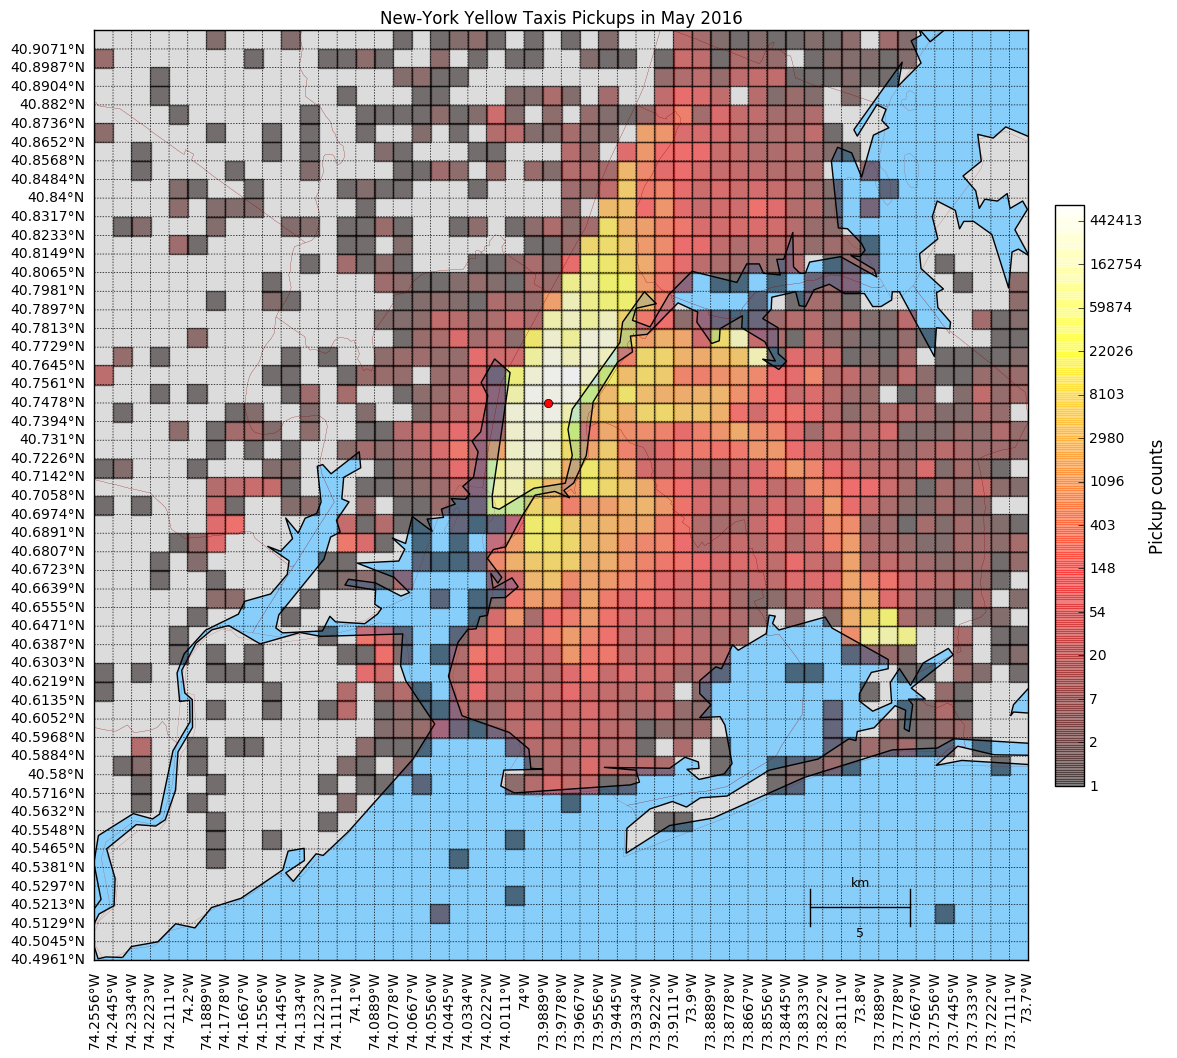

In [9]:
# Границы карты
west, south, east, north = -74.25559, 40.49612, -73.70001, 40.91553

# Подготовка данных для нанесения на карту
points = regions[regions.pickup_counts > 0] # Осталвяем только те, где поездки были.
# Для цветовой гаммы логарифмируем число поездок, так как рост числа вызово растёт экспоненциально
# по направлению к центру города и цвета будут видны только в центре. Логарифм уменьшит этот разборос.
colors = np.log(points.pickup_counts.values)


fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(111)
 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')

m.drawcoastlines()
m.drawcounties(color='darkred')
m.drawrivers()
m.fillcontinents(color='gainsboro', zorder=0)
m.drawmapboundary(fill_color='lightskyblue')
m.drawparallels(lats, linewidth=0.5, labels=[1,0,0,0])
m.drawmeridians(lons, linewidth=0.5, labels=[0,0,0,1], rotation=90)
m.drawmapscale(-73.8, 40.52, 0, 0, 5)

# Координаты Эмпайр-стейт-билдинг: 40.747778°, -73.985833°
x, y = m(-73.98583, 40.747778)
m.plot(x, y, 'ro')

x, y = m(points.center_lon.values,points.center_lat.values) # Преобраз
m.scatter(x, y, s=190, c=colors, marker="s", cmap=cm.hot, alpha=0.5) #s=sizes,

# Создаём цветовую шкалу, для наглядности
cbar = plt.colorbar(orientation='vertical', shrink=0.625, aspect=20, fraction=0.2, pad=0.02)
# Применение логарифма к цветам требует изменения автоматически проставляемых на шкале значений:
ticks = [i for i in range(14)]
cbar.set_ticks(ticks)
ticklabels = [int(np.e**i) for i in ticks]
cbar.set_ticklabels(ticklabels)
cbar.set_label('Pickup counts',size=12)

plt.title('New-York Yellow Taxis Pickups in May 2016')
save('NY1')
plt.show()

Точка Эмпайр-стейт-билдинг находится визуально на границе между регионами. Можеммы всегда можем высилить её регион:

In [10]:
region_num(regions, -73.98583, 40.747778)

1231

На карте довольно много окрашенных регионов, из которых выезд такси невозможен. Голубой фон - вода.
Проведём грубый тест - найдём регионы, у которых все 4 координаты крайних точек находятся в воде.

In [11]:
def is_water(x1, x2, y1, y2):
    x, y = m(x1, y1)
    p1 = m.is_land(x, y)
    x, y = m(x1, y2)
    p2 = m.is_land(x, y)
    x, y = m(x2, y1)
    p3 = m.is_land(x, y)
    x, y = m(x2, y2)
    p4 = m.is_land(x, y)
    if p1 or p2 or p3 or p4:
        return False
    else:
        return True

In [12]:
wrong_regions = []
for i in points.index:
    if is_water(points.ix[i].west, points.ix[i].east, points.ix[i].south, points.ix[i].north):
        wrong_regions.append([int(points.ix[i].region), int(points.ix[i].pickup_counts)])
wrong_regions # перечень регионов в воде, с количеством вызовов из них

[[860, 2],
 [872, 2],
 [873, 1],
 [903, 3],
 [917, 1],
 [920, 2],
 [922, 1],
 [956, 1],
 [963, 5],
 [972, 1],
 [973, 1],
 [974, 3],
 [1020, 1],
 [1022, 3],
 [1024, 1],
 [1074, 3],
 [1081, 13],
 [1104, 1],
 [1107, 1],
 [1259, 1],
 [1785, 4],
 [1786, 2],
 [1866, 1],
 [1916, 1],
 [1963, 3],
 [1964, 3],
 [2017, 2],
 [2037, 9],
 [2091, 6],
 [2142, 2],
 [2253, 1]]

In [13]:
print "Найден %i регион с количеством вызовов такси больше 0, но из которых поездка скорее всего невозможна." % len(wrong_regions)
print "Всего в мае %i таких поездок." % sum([i[1] for i in wrong_regions])

Найден 31 регион с количеством вызовов такси больше 0, но из которых поездка скорее всего невозможна.
Всего в мае 81 таких поездок.


Правильно было бы удалить соответствующие поездки и основной базы и обнулить в агрегированной.
Но задания такого нет, просто делаем пока заметку на будущее.

## 4. Вставьте интерактивную карту Нью-Йорка
**Задание**: Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

Координаты Статуи Свободы из Википедии - 40.689167°, -74.044444°

В качестве интерактивной карты используем folium

In [14]:
import folium

print(folium.__version__) # Проверка версии, так как на текущем релизе 0.2 нужные далее инструменты не работают.

0.3.0.dev


In [15]:
lat = np.mean(lats)
lon = np.mean(lons)
zoom_start = 11

im = folium.Map(location=[lat, lon], zoom_start=zoom_start)
folium.Marker([40.689167, -74.044444], popup='Statue of Liberty').add_to(im)
im

## 5. Нарисуйте ячейки
**Задание**: Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [16]:
# Подготовка данных:
points['mean_pickup_counts'] = points['pickup_counts'] / float(24*31)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
# Создадим вектор проголарифмирвоанных и отнормирванных значений количества поездок в среднем за месяц, для определения цветов
norm = plt.Normalize()
colors_1 = norm(np.log(points['mean_pickup_counts']))

In [18]:
# Координаты середины карты:
lat = np.mean(lats)
lon = np.mean(lons)

# Стартовое увеличение карты:
zoom_start = 11 

# Создание шкалы цветов:
import branca.colormap as cmap
linear = cmap.LinearColormap(['#2166ac', 'red'], index=[min(colors_1), max(colors_1)])


im = folium.Map(location=[lat, lon], zoom_start=zoom_start) # инициация карты
folium.Marker([40.689167, -74.044444], popup='Statue of Liberty').add_to(im) # маркер Статуи Свободы

# Нанесение на карту прямоугольных маркеров с фикисрованными координатами, раскрашенными по созданной шкале:
j=-1
for i in points.index:
    j += 1
    rgb = linear.rgb_hex_str(colors_1[j]) # cmap.linear.YlOrBr.rgb_hex_str(colors_1[j]) # 
    folium.features.RectangleMarker(bounds=[[points.ix[i].south, points.ix[i].west], [points.ix[i].north, points.ix[i].east]],
                                    color = 'transparent',
                                    fill_color = rgb,
                                    fill_opacity = 0.5,
                                    popup = "Region: " + str(int(points.ix[i].region)) + \
                                            "\n Mean pickups per hour: " + str(round(points.ix[i].mean_pickup_counts,1))
                                   ).add_to(im)

# Отображение шкалы на карте:
colormap = cmap.LinearColormap(['#2166ac', 'red']).scale(1, int(max(points.mean_pickup_counts.values)))
colormap.caption = 'A colormap caption'
im.add_child(colormap)
    
im.save(os.path.join('results', 'NY1.html')) # Сохранение карты в отдельный файл html
im

## 6. Отфильтруйте ячейки меньше 5 поездок
Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [19]:
points = points[points.mean_pickup_counts > 5]
print "Осталось %i региона, из которых в мае в среднем совершено больше 5 поездок в час." % points.shape[0]

Осталось 102 региона, из которых в мае в среднем совершено больше 5 поездок в час.


In [20]:
norm = plt.Normalize()
colors_1 = norm(np.log(points['mean_pickup_counts']))

lat = np.mean(lats)
lon = np.mean(lons)
zoom_start = 11 

linear = cmap.LinearColormap(['#2166ac', 'red'], index=[min(colors_1), max(colors_1)])

im = folium.Map(location=[lat, lon], zoom_start=zoom_start)

j=-1
for i in points.index:
    j += 1
    rgb = linear.rgb_hex_str(colors_1[j])
    folium.features.RectangleMarker(bounds=[[points.ix[i].south, points.ix[i].west], [points.ix[i].north, points.ix[i].east]],
                                    color = 'transparent',
                                    fill_color = rgb,
                                    fill_opacity = 0.5,
                                    popup = "Region: " + str(int(points.ix[i].region)) + \
                                            "\n Mean pickups per hour: " + str(round(points.ix[i].mean_pickup_counts,1))
                                   ).add_to(im)

colormap = cmap.LinearColormap(['#2166ac', 'red']).scale(1, int(max(points.mean_pickup_counts.values)))
colormap.caption = 'A colormap caption'
im.add_child(colormap)
im

In [21]:
wrong_regions = []
for i in points.index:
    if is_water(points.ix[i].west, points.ix[i].east, points.ix[i].south, points.ix[i].north):
        wrong_regions.append([int(points.ix[i].region), int(points.ix[i].pickup_counts)])
wrong_regions # перечень регионов в воде, с количеством вызовов из них

[]

Ни визуально, ни с помощью проверки коррдинат невозможных регионов после такой фильтрации найти не удалось.

# Удачные решения сокурсников:

In [22]:
############# Maksimov ###############

url_base = 'http://server.arcgisonline.com/ArcGIS/rest/services/'
service = 'NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'
tileset = url_base + service

im = folium.Map(location=[(north+south)/2, (east+west)/2], zoom_start=11,
                     control_scale = True, tiles=tileset, attr='USGS style')

# avg_map.add_children(plugins.HeatMap(avg_map_data[['ctr_lat', 'ctr_lng', 'trips']].values, radius=15))

### Дальше моё:
j=-1
for i in points.index:
    j += 1
    rgb = linear.rgb_hex_str(colors_1[j])
    folium.features.RectangleMarker(bounds=[[points.ix[i].south, points.ix[i].west], [points.ix[i].north, points.ix[i].east]],
                                    color = 'transparent',
                                    fill_color = rgb,
                                    fill_opacity = 0.5,
                                    popup = "Region: " + str(int(points.ix[i].region)) + \
                                            "\n Mean pickups per hour: " + str(round(points.ix[i].mean_pickup_counts,1))
                                   ).add_to(im)

colormap = cmap.LinearColormap(['#2166ac', 'red']).scale(1, int(max(points.mean_pickup_counts.values)))
colormap.caption = 'A colormap caption'
im.add_child(colormap)
im

In [23]:
points

region       west       east      south      north  center_lon  \
1074    1075 -74.022246 -74.011135  40.697437  40.705825  -74.016691   
1075    1076 -74.022246 -74.011135  40.705825  40.714213  -74.016691   
1076    1077 -74.022246 -74.011135  40.714213  40.722601  -74.016691   
1124    1125 -74.011135 -74.000023  40.697437  40.705825  -74.005579   
1125    1126 -74.011135 -74.000023  40.705825  40.714213  -74.005579   
1126    1127 -74.011135 -74.000023  40.714213  40.722601  -74.005579   
1127    1128 -74.011135 -74.000023  40.722601  40.730990  -74.005579   
1128    1129 -74.011135 -74.000023  40.730990  40.739378  -74.005579   
1129    1130 -74.011135 -74.000023  40.739378  40.747766  -74.005579   
1130    1131 -74.011135 -74.000023  40.747766  40.756154  -74.005579   
1131    1132 -74.011135 -74.000023  40.756154  40.764542  -74.005579   
1171    1172 -74.000023 -73.988912  40.672272  40.680660  -73.994467   
1172    1173 -74.000023 -73.988912  40.680660  40.689049  -73.994467   
1173    1174 -74.000023 -73.988912  40.689049  40.697437  -73.994467   
1174    1175 -74.000023 -73.988912  40.697437  40.705825  -73.994467   
1175    1176 -74.000023 -73.988912  40.705825  40.714213  -73.994467   
1176    1177 -74.000023 -73.988912  40.714213  40.722601  -73.994467   
1177    1178 -74.000023 -73.988912  40.722601  40.730990  -73.994467   
1178    1179 -74.000023 -73.988912  40.730990  40.739378  -73.994467   
1179    1180 -74.000023 -73.988912  40.739378  40.747766  -73.994467   
1180    1181 -74.000023 -73.988912  40.747766  40.756154  -73.994467   
1181    1182 -74.000023 -73.988912  40.756154  40.764542  -73.994467   
1182    1183 -74.000023 -73.988912  40.764542  40.772931  -73.994467   
1183    1184 -74.000023 -73.988912  40.772931  40.781319  -73.994467   
1220    1221 -73.988912 -73.977800  40.663884  40.672272  -73.983356   
1221    1222 -73.988912 -73.977800  40.672272  40.680660  -73.983356   
1222    1223 -73.988912 -73.977800  40.680660  40.689049  -73.983356   
1223    1224 -73.988912 -73.977800  40.689049  40.697437  -73.983356   
1224    1225 -73.988912 -73.977800  40.697437  40.705825  -73.983356   
1226    1227 -73.988912 -73.977800  40.714213  40.722601  -73.983356   
...      ...        ...        ...        ...        ...         ...   
1387    1388 -73.955577 -73.944465  40.806483  40.814872  -73.950021   
1388    1389 -73.955577 -73.944465  40.814872  40.823260  -73.950021   
1389    1390 -73.955577 -73.944465  40.823260  40.831648  -73.950021   
1425    1426 -73.944465 -73.933354  40.705825  40.714213  -73.938909   
1430    1431 -73.944465 -73.933354  40.747766  40.756154  -73.938909   
1433    1434 -73.944465 -73.933354  40.772931  40.781319  -73.938909   
1434    1435 -73.944465 -73.933354  40.781319  40.789707  -73.938909   
1435    1436 -73.944465 -73.933354  40.789707  40.798095  -73.938909   
1436    1437 -73.944465 -73.933354  40.798095  40.806483  -73.938909   
1437    1438 -73.944465 -73.933354  40.806483  40.814872  -73.938909   
1438    1439 -73.944465 -73.933354  40.814872  40.823260  -73.938909   
1440    1441 -73.944465 -73.933354  40.831648  40.840036  -73.938909   
1441    1442 -73.944465 -73.933354  40.840036  40.848424  -73.938909   
1479    1480 -73.933354 -73.922242  40.739378  40.747766  -73.927798   
1481    1482 -73.933354 -73.922242  40.756154  40.764542  -73.927798   
1482    1483 -73.933354 -73.922242  40.764542  40.772931  -73.927798   
1529    1530 -73.922242 -73.911130  40.739378  40.747766  -73.916686   
1531    1532 -73.922242 -73.911130  40.756154  40.764542  -73.916686   
1532    1533 -73.922242 -73.911130  40.764542  40.772931  -73.916686   
1579    1580 -73.911130 -73.900019  40.739378  40.747766  -73.905575   
1629    1630 -73.900019 -73.888907  40.739378  40.747766  -73.894463   
1683    1684 -73.888907 -73.877796  40.772931  40.781319  -73.883351   
1732    1733 -73.877796 -73.866684  40.764542  40.772931  -73.872240   
1733    1734 -73.877796 -73.866684  40.772931 

In [93]:
df = pd.read_pickle("df_results_june_01.pkl")

row_blank = [0 for i in range(len(df.columns)-4)]
row_nr = max(df.index)

for region in df['region'].unique():
    for i in range(6):
        row_nr += 1
        df.loc[row_nr] = [30,18+i,6,region] + row_blank

df['year'] = 2016

df = df.sort_values(by=['region','year', 'month','day', 'hour' ])

for i in [1,2,3,4,5,6]:
    df['y%i'%i] = df['y%i'%i].shift(i)
    df['y%i_pred'%i] = df['y%i_pred'%i].shift(i)
    
time_range = pd.date_range(start = '01-JUN-2016', end = '01-JUL-2016', format="%Y-%m-%d %H", freq = 'H')[:-1]
df_june = pd.DataFrame(index=time_range, columns=[1075,'1075_'])
for region in df['region'].unique():
    df_june[int(region)] = list(df.loc[df['region']==region,'y1'][1:6].values) + \
                        list(df.loc[df['region']==region,'y6'][6:].values)
    df_june[str(int(region))+"_"] = df.loc[df['region']==region, 
                                          ['y1_pred','y2_pred','y3_pred','y4_pred','y5_pred','y6_pred']][1:].mean(axis=1).values

df_june.to_pickle('df_june4map.pkl')

In [94]:
df_june

1075       1075_   1076       1076_   1077       1077_  \
2016-06-01 00:00:00   26.0   22.144768   30.0    8.539728   19.0    3.988280   
2016-06-01 01:00:00   14.0   14.236234   21.0    9.687764    6.0    3.866243   
2016-06-01 02:00:00    5.0    5.398195   25.0    4.990620    4.0    2.374514   
2016-06-01 03:00:00    2.0    3.715770    5.0    8.048318    3.0    3.658363   
2016-06-01 04:00:00    1.0    3.168692    8.0    9.814929    3.0    3.898244   
2016-06-01 05:00:00    7.0   15.702328   31.0   27.123809   17.0   23.915963   
2016-06-01 06:00:00   23.0   38.144891   54.0   78.907310   78.0   68.733803   
2016-06-01 07:00:00   34.0   69.507576  151.0  173.055438  163.0  148.886707   
2016-06-01 08:00:00   72.0   82.602454  185.0  215.571253  181.0  194.042915   
2016-06-01 09:00:00   54.0   73.533319  166.0  195.496778  142.0  147.123707   
2016-06-01 10:00:00   51.0   70.138114  154.0  172.123609   98.0  112.204109   
2016-06-01 11:00:00   83.0   72.472088  165.0  177.149600  113.0  106.303341   
2016-06-01 12:00:00   70.0   79.696962  204.0  175.749756  104.0  103.565989   
2016-06-01 13:00:00  100.0   86.549962  196.0  184.251650   98.0  106.224885   
2016-06-01 14:00:00  119.0   89.413666  188.0  199.437528   98.0  106.644642   
2016-06-01 15:00:00   88.0   92.011742  200.0  194.509926   87.0  101.696056   
2016-06-01 16:00:00   75.0   87.060318  158.0  166.622721   70.0   89.806311   
2016-06-01 17:00:00   84.0   94.183008  164.0  182.745522  124.0  104.031155   
2016-06-01 18:00:00  122.0   94.841134  206.0  193.625328  173.0  133.229301   
2016-06-01 19:00:00  106.0  100.393155  180.0  190.044202  166.0  149.334811   
2016-06-01 20:00:00  105.0   93.676631  188.0  179.387985  175.0  142.737879   
2016-06-01 21:00:00  135.0   90.678916  225.0  168.876615  126.0  136.351128   
2016-06-01 22:00:00   86.0   86.013418  137.0  155.464567  132.0  113.941594   
2016-06-01 23:00:00   62.0   64.811337   97.0  118.336425   65.0   80.471011   
2016-06-02 00:00:00   35.0   43.174185   51.0   71.030207   29.0   41.958914   
2016-06-02 01:00:00   18.0   20.734771   24.0   39.529355   12.0   20.113391   
2016-06-02 02:00:00    7.0   10.129373   17.0   15.574391    4.0    8.706150   
2016-06-02 03:00:00    5.0    6.817638   11.0   16.479951    4.0    8.631306   
2016-06-02 04:00:00    3.0    5.455007   16.0   13.685564    4.0    6.333120   
2016-06-02 05:00:00   10.0   16.260288   33.0   30.458359   15.0   20.304069   
...                    ...         ...    ...         ...    ...         ...   
2016-06-29 18:00:00  101.0  109.722926  173.0  205.412804  139.0  137.794704   
2016-06-29 19:00:00  112.0  109.248605  198.0  192.456017  163.0  152.978518   
2016-06-29 20:00:00  123.0  100.092762  158.0  173.551356  181.0  145.243446   
2016-06-29 21:00:00  143.0   98.537034  194.0  163.999237  165.0  132.395655   
2016-06-29 22:00:00  124.0  100.117922  163.0  153.873044  131.0  120.136701   
2016-06-29 23:00:00   93.0   67.767330  109.0  109.699289   88.0   82.016584   
2016-06-30 00:00:00   42.0   47.152644   71.0   74.533229   34.0   47.927310   
2016-06-30 01:00:00   26.0   22.448536   44.0   35.561845   16.0   21.186366   
2016-06-30 02:00:00   11.0   11.009184   20.0   16.815066    7.0    7.640788   
2016-06-30 03:00:00    4.0    5.313740   11.0   13.334658    5.0    6.400714   
2016-06-30 04:00:00   11.0    6.041605   14.0   13.685931    2.0    6.445598   
2016-06-30 05:00:00   10.0   18.003410   35.0   30.346328   12.0   15.708713   
2016-06-30 06:00:00   26.0   42.701026   80.0   81.813072   84.0   62.077673   
2016-06-30 07:00:00   39.0   84.111734  140.0  161.436859  122.0  151.020510   
2016-06-30 08:00:00   57.0  100.577914  196.0  208.374064  170.0  197.614894   
2016-06-30 09:00:00   58.0   86.881519  176.0  197.783127  143.0  145.183640   
2016-06-30 10:00:00   56.0   85.911934  169.0  179.078644   81.0  113.129687   
2016-06-30 11:00:00   71.0   86.245979  199.0  188.167666  103.0  106.367990   
2016-06-30 12:00:00  1

In [91]:
df = pd.read_pickle("df_results_june_01.pkl")

In [92]:
df

day  hour  month  region  test     y1     y1_pred     y2  \
21168    31.0  23.0    5.0  1075.0   1.0   26.0   22.144768   14.0   
21169     1.0   0.0    6.0  1075.0   2.0   14.0   12.159758    5.0   
21170     1.0   1.0    6.0  1075.0   2.0    5.0    8.167297    2.0   
21171     1.0   2.0    6.0  1075.0   2.0    2.0    6.347524    1.0   
21172     1.0   3.0    6.0  1075.0   2.0    1.0    4.560234    7.0   
21173     1.0   4.0    6.0  1075.0   2.0    7.0   10.798492   23.0   
21174     1.0   5.0    6.0  1075.0   2.0   23.0   23.175024   34.0   
21175     1.0   6.0    6.0  1075.0   2.0   34.0   53.456074   72.0   
21176     1.0   7.0    6.0  1075.0   2.0   72.0   61.648369   54.0   
21177     1.0   8.0    6.0  1075.0   2.0   54.0   71.793709   51.0   
21178     1.0   9.0    6.0  1075.0   2.0   51.0   61.822163   83.0   
21179     1.0  10.0    6.0  1075.0   2.0   83.0   69.713242   70.0   
21180     1.0  11.0    6.0  1075.0   2.0   70.0   91.931465  100.0   
21181     1.0  12.0    6.0  1075.0   2.0  100.0   85.961487  119.0   
21182     1.0  13.0    6.0  1075.0   2.0  119.0  100.948814   88.0   
21183     1.0  14.0    6.0  1075.0   2.0   88.0  108.539719   75.0   
21184     1.0  15.0    6.0  1075.0   2.0   75.0   77.167923   84.0   
21185     1.0  16.0    6.0  1075.0   2.0   84.0   86.964462  122.0   
21186     1.0  17.0    6.0  1075.0   2.0  122.0   93.511963  106.0   
21187     1.0  18.0    6.0  1075.0   2.0  106.0  124.937180  105.0   
21188     1.0  19.0    6.0  1075.0   2.0  105.0   96.699173  135.0   
21189     1.0  20.0    6.0  1075.0   2.0  135.0   98.857918   86.0   
21190     1.0  21.0    6.0  1075.0   2.0   86.0  121.322479   62.0   
21191     1.0  22.0    6.0  1075.0   2.0   62.0   65.874718   35.0   
21192     1.0  23.0    6.0  1075.0   2.0   35.0   41.631512   18.0   
21193     2.0   0.0    6.0  1075.0   2.0   18.0   19.864283    7.0   
21194     2.0   1.0    6.0  1075.0   2.0    7.0   11.247796    5.0   
21195     2.0   2.0    6.0  1075.0   2.0    5.0    5.918603    3.0   
21196     2.0   3.0    6.0  1075.0   2.0    3.0    4.618622   10.0   
21197     2.0   4.0    6.0  1075.0   2.0   10.0   10.074272   18.0   
...       ...   ...    ...     ...   ...    ...         ...    ...   
2232541  29.0  12.0    6.0  2168.0   2.0    1.0    4.879189    3.0   
2232542  29.0  13.0    6.0  2168.0   2.0    3.0    4.560985    2.0   
2232543  29.0  14.0    6.0  2168.0   2.0    2.0   23.025652    0.0   
2232544  29.0  15.0    6.0  2168.0   2.0    0.0    0.739881    2.0   
2232545  29.0  16.0    6.0  2168.0   2.0    2.0   19.800304    1.0   
2232546  29.0  17.0    6.0  2168.0   2.0    1.0   16.465353    0.0   
2232547  29.0  18.0    6.0  2168.0   2.0    0.0   20.733608    1.0   
2232548  29.0  19.0    6.0  2168.0   2.0    1.0   11.180046    0.0   
2232549  29.0  20.0    6.0  2168.0   2.0    0.0   12.283689    1.0   
2232550  29.0  21.0    6.0  2168.0   2.0    1.0   12.044333    0.0   
2232551  29.0  22.0    6.0  2168.0   2.0    0.0   17.331306    1.0   
2232552  29.0  23.0    6.0  2168.0   2.0    1.0   30.866776    2.0   
2232553  30.0   0.0    6.0  2168.0   2.0    2.0   -6.360936    0.0   
2232554  30.0   1.0    6.0  2168.0   2.0    0.0    0.253410    0.0   
2232555  30.0   2.0    6.0  2168.0   2.0    0.0    5.411624    0.0   
2232556  30.0   3.0    6.0  2168.0   2.0    0.0    2.147450    4.0   
2232557  30.0   4.0    6.0  2168.0   2.0    4.0   53.632656    5.0   
2232558  30.0   5.0    6.0  2168.0   2.0    5.0   32.795170    4.0   
2232559  30.0   6.0    6.0  2168.0   2.0    4.0   47.951691    1.0   
2232560  30.0   7.0    6.0  2168.0   2.0    1.0   31.027714    0.0   
2232561  30.0   8.0    6.0  2168.0   2.0    0.0   -6.432949    1.0   
2232562  30.0   9.0    6.0  2168.0   2.0    1.0   -6.033952    0.0   
2232563  30.0  10.0    6.0  2168.0   2.0    0.0    3.198997    2.0   
2232564  30.0  11.0    6.0  2168.0   2.0    2.0    7.090274    1.0   
2232565  30.0  12.0    6.0  2168.0   2.0    1.0   -5.418239    0.0   
2232566  30.0  13.0 

In [96]:
df_2016_0506 = pd.concat([df_may, df_june])

In [102]:
#df_2016_0506.to_csv('df_2016_0506.csv')

In [98]:
31*24+30*24

1464

In [31]:
import ipywidgets as widgets
from ipywidgets.widgets import interact
from ipywidgets.widgets import interactive
from IPython.display import display
from datetime import datetime

In [24]:
df = pd.read_pickle('df_2016_0506.pkl')

In [32]:
a = widgets.ToggleButtons(
    options=['May 2016', 'June 2016'],
    description='Month:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
#     icon='check'
)

In [33]:
a

In [34]:
a = widgets.Dropdown(options=['May 2016', 'June 2016'])

In [35]:
a


In [28]:
widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
#     readout_format='i',
#     slider_color='black'
)

In [29]:
a.get_state()['value']

u'May 2016'

In [30]:
url_base = 'http://server.arcgisonline.com/ArcGIS/rest/services/'
service = 'NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'
tileset = url_base + service

im = folium.Map(location=[(north+south)/2, (east+west)/2], zoom_start=11,
                     control_scale = True, tiles=tileset, attr='USGS style')


def draw_regions(points, regions, ):
    j=-1
    for i in points.index:
        j += 1
        rgb = linear.rgb_hex_str(colors_1[j])
        folium.features.RectangleMarker(bounds=[[points.ix[i].south, points.ix[i].west], [points.ix[i].north, points.ix[i].east]],
                                        color = 'transparent',
                                        fill_color = rgb,
                                        fill_opacity = 0.5,
                                        popup = "Region: " + str(int(points.ix[i].region)) + \
                                                "\n Mean pickups per hour: " + str(round(points.ix[i].mean_pickup_counts,1))
                                       ).add_to(im)

    colormap = cmap.LinearColormap(['#2166ac', 'red']).scale(1, int(max(points.mean_pickup_counts.values)))
    colormap.caption = 'A colormap caption'
    im.add_child(colormap)
    im

In [43]:
points

region       west       east      south      north  center_lon  \
1074    1075 -74.022246 -74.011135  40.697437  40.705825  -74.016691   
1075    1076 -74.022246 -74.011135  40.705825  40.714213  -74.016691   
1076    1077 -74.022246 -74.011135  40.714213  40.722601  -74.016691   
1124    1125 -74.011135 -74.000023  40.697437  40.705825  -74.005579   
1125    1126 -74.011135 -74.000023  40.705825  40.714213  -74.005579   
1126    1127 -74.011135 -74.000023  40.714213  40.722601  -74.005579   
1127    1128 -74.011135 -74.000023  40.722601  40.730990  -74.005579   
1128    1129 -74.011135 -74.000023  40.730990  40.739378  -74.005579   
1129    1130 -74.011135 -74.000023  40.739378  40.747766  -74.005579   
1130    1131 -74.011135 -74.000023  40.747766  40.756154  -74.005579   
1131    1132 -74.011135 -74.000023  40.756154  40.764542  -74.005579   
1171    1172 -74.000023 -73.988912  40.672272  40.680660  -73.994467   
1172    1173 -74.000023 -73.988912  40.680660  40.689049  -73.994467   
1173    1174 -74.000023 -73.988912  40.689049  40.697437  -73.994467   
1174    1175 -74.000023 -73.988912  40.697437  40.705825  -73.994467   
1175    1176 -74.000023 -73.988912  40.705825  40.714213  -73.994467   
1176    1177 -74.000023 -73.988912  40.714213  40.722601  -73.994467   
1177    1178 -74.000023 -73.988912  40.722601  40.730990  -73.994467   
1178    1179 -74.000023 -73.988912  40.730990  40.739378  -73.994467   
1179    1180 -74.000023 -73.988912  40.739378  40.747766  -73.994467   
1180    1181 -74.000023 -73.988912  40.747766  40.756154  -73.994467   
1181    1182 -74.000023 -73.988912  40.756154  40.764542  -73.994467   
1182    1183 -74.000023 -73.988912  40.764542  40.772931  -73.994467   
1183    1184 -74.000023 -73.988912  40.772931  40.781319  -73.994467   
1220    1221 -73.988912 -73.977800  40.663884  40.672272  -73.983356   
1221    1222 -73.988912 -73.977800  40.672272  40.680660  -73.983356   
1222    1223 -73.988912 -73.977800  40.680660  40.689049  -73.983356   
1223    1224 -73.988912 -73.977800  40.689049  40.697437  -73.983356   
1224    1225 -73.988912 -73.977800  40.697437  40.705825  -73.983356   
1226    1227 -73.988912 -73.977800  40.714213  40.722601  -73.983356   
...      ...        ...        ...        ...        ...         ...   
1387    1388 -73.955577 -73.944465  40.806483  40.814872  -73.950021   
1388    1389 -73.955577 -73.944465  40.814872  40.823260  -73.950021   
1389    1390 -73.955577 -73.944465  40.823260  40.831648  -73.950021   
1425    1426 -73.944465 -73.933354  40.705825  40.714213  -73.938909   
1430    1431 -73.944465 -73.933354  40.747766  40.756154  -73.938909   
1433    1434 -73.944465 -73.933354  40.772931  40.781319  -73.938909   
1434    1435 -73.944465 -73.933354  40.781319  40.789707  -73.938909   
1435    1436 -73.944465 -73.933354  40.789707  40.798095  -73.938909   
1436    1437 -73.944465 -73.933354  40.798095  40.806483  -73.938909   
1437    1438 -73.944465 -73.933354  40.806483  40.814872  -73.938909   
1438    1439 -73.944465 -73.933354  40.814872  40.823260  -73.938909   
1440    1441 -73.944465 -73.933354  40.831648  40.840036  -73.938909   
1441    1442 -73.944465 -73.933354  40.840036  40.848424  -73.938909   
1479    1480 -73.933354 -73.922242  40.739378  40.747766  -73.927798   
1481    1482 -73.933354 -73.922242  40.756154  40.764542  -73.927798   
1482    1483 -73.933354 -73.922242  40.764542  40.772931  -73.927798   
1529    1530 -73.922242 -73.911130  40.739378  40.747766  -73.916686   
1531    1532 -73.922242 -73.911130  40.756154  40.764542  -73.916686   
1532    1533 -73.922242 -73.911130  40.764542  40.772931  -73.916686   
1579    1580 -73.911130 -73.900019  40.739378  40.747766  -73.905575   
1629    1630 -73.900019 -73.888907  40.739378  40.747766  -73.894463   
1683    1684 -73.888907 -73.877796  40.772931  40.781319  -73.883351   
1732    1733 -73.877796 -73.866684  40.764542  40.772931  -73.872240   
1733    1734 -73.877796 -73.866684  40.772931 

In [58]:
choosen_month = widgets.ToggleButtons(
                                        description='Month:',
                                        options=['May 2016', 'June 2016'],
                                      )

def on_button_clicked(b):
    global month
    global last_day

    print "last day = ", b
    
choosen_month.observe(on_button_clicked)

display(choosen_month)


def choose_day(month):
    if month == 5:
        last_day = 31
    else:
        last_day = 30
    choosen_day = widgets.Dropdown(
                            options=range(1, last_day+1),
                            value=1,
                            description='Day:',
                           )
    return choosen_day
    
month = 5
day=1

def choose_moment(day=1, hour=12):  #choosen_month.value choosen_day.value month=month, 

    if choosen_month.value == 'May 2016':
        month = 5
        last_day = 31
    else:
        month = 6
        last_day = 30
    display(choose_day(month))
    day = choosen_day.value
    data = df.loc[datetime(2016, month, day, hour)]
    #a = 
    print data.shape
    #return a

v = interact(choose_moment, day=(1, last_day), hour=(0,23)) # month=(5,6), 
display(v)

NameError: global name 'choosen_day' is not defined

<function __main__.choose_moment>

In [38]:
time2show = datetime(2016, 5, 1, 0)

def choose_moment(day=1, hour=12):  #choosen_month.value choosen_day.value month=month, 
    global time2show
    time2show =  datetime(2016, month, day, hour)
    print datetime(2016, month, day, hour)

choosen_month = widgets.ToggleButtons(
                                        description='Month:',
                                        options=['May 2016', 'June 2016'],
                                      )

def on_button_clicked(b):
    global month
    global last_day
    if type(b.new)==str:
        if choosen_month.value == 'May 2016':
            month = 5
            last_day = 31
        else:
            month = 6
            last_day = 30
        global v
        v.close()
        v= interactive(choose_moment, day=(1, last_day), hour=(0,23)) # month=(5,6), 
        display(v)
    
choosen_month.observe(on_button_clicked)

button = widgets.Button(description="Show the map!")
def on_button_clicked(b):
    #data = df.loc[time2show]
    im
button.on_click(on_button_clicked)

In [39]:
display(choosen_month)
v= interactive(choose_moment, day=(1, last_day), hour=(0,23)) # month=(5,6), 
display(v)

In [40]:
display(button)

In [52]:
widgets.HBox([m, v])

ValueError: Can't clean for JSON: <mpl_toolkits.basemap.Basemap object at 0x000000000949F978>

In [29]:
def show_map():
    im

In [30]:
show_map()

In [22]:
plt.show()

In [267]:
%matplotlib qt 

In [37]:
widgets.DatePicker(max=datetime(2017, 1, 25, 0, 0))

In [5]:
a.value

datetime.datetime(2017, 1, 25, 0, 0)

In [25]:
import datetime as dt
from io import BytesIO

import numpy as np
import pandas as pd
import holoviews as hv

from matplotlib.image import imread
from mpl_toolkits.basemap import Basemap

hv.notebook_extension('bokeh', width=90)

In [27]:
m.landpolygons

In [28]:
[poly.get_coords() for poly in m.landpolygons]

[array([[ 41507.92256711,  46783.03590207],
        [ 41586.64787601,  46534.31353745],
        [ 41091.19004854,  46256.87264395],
        [ 41586.64787601,  45138.67790176],
        [ 40428.64422978,  43970.30225482],
        [ 40637.66550074,  45182.20751286],
        [ 38206.82553473,  41779.98826363],
        [ 38380.36479982,  41460.07065242],
        [ 39364.82918096,  43038.46500923],
        [ 39827.38551207,  42808.93702804],
        [ 39613.84834945,  42249.22576653],
        [ 39966.08789867,  41878.95224408],
        [ 39190.64478849,  41506.99103707],
        [ 38594.54708982,  39404.39656957],
        [ 38096.50875284,  40618.11355933],
        [ 37389.44914489,  40897.90225653],
        [ 37077.20749321,  40199.30328241],
        [ 37426.8665329 ,  36842.85273888],
        [ 37889.42286401,  36799.37212206],
        [ 38594.54708982,  36054.27335167],
        [ 38768.08635491,  35725.22611531],
        [ 38521.64769594,  35403.01266675],
        [ 38063.60725648,  35446

In [30]:
%%opts Polygons (cmap='hot' edgecolor='k' linewidth=2)
np.random.seed(35)
hv.Polygons([np.random.rand(4,2)], level=0.5) *\
hv.Polygons([np.random.rand(4,2)], level=1.0) *\
hv.Polygons([np.random.rand(4,2)], level=1.5) *\
hv.Polygons([np.random.rand(4,2)], level=2.0)

AttributeError: 'Figure' object has no attribute 'set'

:Overlay
   .Polygons.I   :Polygons   [x,y]   (Value)
   .Polygons.II  :Polygons   [x,y]   (Value)
   .Polygons.III :Polygons   [x,y]   (Value)
   .Polygons.IV  :Polygons   [x,y]   (Value)

In [51]:
im